## Assignment

In this exercise, you'll predict house prices using your model. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

* Load the **houseprices** data from Thinkful's database.
* Split your data into train and test sets.
* Estimate your model from the previous checkpoint in the train set. Assess the goodness of fit of your model.
* Predict the house prices in the test set, and evaluate the performance of your model using the metrics we mentioned in this checkpoint.
* Is the performance of your model satisfactory? Why?
* Try to improve your model in terms of predictive performance by adding or removing some variables.

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sqlalchemy import create_engine
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
house_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()


house_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [54]:
subcat = ['mszoning', 'street', 'exterqual']

for i in subcat:
    dummy_column_names = []
    house_df = pd.concat([house_df,
                         pd.get_dummies(house_df[i], prefix=i, drop_first=True)], axis=1
                        )
    
house_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,salecondition,saleprice,mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,street_Pave,exterqual_Fa,exterqual_Gd,exterqual_TA
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,Normal,208500,0,0,1,0,1,0,1,0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,Normal,181500,0,0,1,0,1,0,0,1
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,Normal,223500,0,0,1,0,1,0,1,0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,Abnorml,140000,0,0,1,0,1,0,0,1
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,Normal,250000,0,0,1,0,1,0,1,0


In [55]:
#Model1

cat_column_names = list(house_df.columns[-5:])

Y = house_df['saleprice']

X = house_df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf', 'firstflrsf',
              'fullbath', 'totrmsabvgrd', 'yearbuilt', 'yearremodadd', 'lotarea'] + cat_column_names]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in the training set is {}".format(X_train.shape[0]))
print("The number of observations in the test set is {}".format(X_test.shape[0]))

The number of observations in the training set is 1168
The number of observations in the test set is 292


In [57]:
X_train = sm.add_constant(X_train)

lin_reg = sm.OLS(y_train, X_train).fit()

print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     277.9
Date:                Fri, 18 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:04:36   Log-Likelihood:                -13902.
No. Observations:                1168   AIC:                         2.784e+04
Df Residuals:                    1151   BIC:                         2.792e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -7.679e+05   1.56e+05     -4.936   

The goodness of fit statistics show that, R-squared is 0.794, adjusted R-squared is 0.792, AIC is 27,840 and BIC is 27,920. Now, let's evaluate the test set performance.

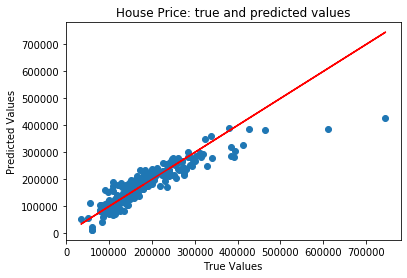

Mean absolute error of the prediction is: 22640.35393358919
Mean squared error of the prediction is: 1310351833.9599538
Root mean squared error of the prediction is: 36198.782216532556
Mean absolute percentage error of the prediction is: 13.325592438300202


In [58]:
X_test = sm.add_constant(X_test)
y_preds = lin_reg.predict(X_test)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color='red')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title("House Price: true and predicted values")

plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

The evaluation metrics are given above. Now, let's try another model specification and compare this two models. 

In [62]:
#Model2: adding fireplaces to model 1

cat_column_names = list(house_df.columns[-8:])

Y = house_df['saleprice']

X = house_df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf', 'firstflrsf',
              'fullbath', 'totrmsabvgrd', 'yearbuilt', 'yearremodadd', 'lotarea', 'fireplaces'] + cat_column_names]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in the training set is {}".format(X_train.shape[0]))
print("The number of observations in the test set is {}".format(X_test.shape[0]))

The number of observations in the training set is 1168
The number of observations in the test set is 292


In [64]:
X_train = sm.add_constant(X_train)

lin_reg = sm.OLS(y_train, X_train).fit()

print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     229.4
Date:                Fri, 18 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:06:50   Log-Likelihood:                -13886.
No. Observations:                1168   AIC:                         2.781e+04
Df Residuals:                    1147   BIC:                         2.792e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -7.839e+05   1.55e+05     -5.062   

The second model's R-squared and adjusted R-squared values are slightly higher and AIC and BIC and slightly lower than the first model. Let's evaluate the test set performance of the second model. 

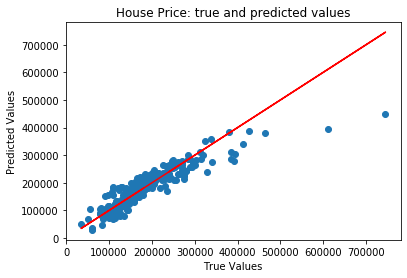

Mean absolute error of the prediction is: 22253.4905669807
Mean squared error of the prediction is: 1237305313.4000735
Root mean squared error of the prediction is: 35175.35093499528
Mean absolute percentage error of the prediction is: 12.916217744192583


In [65]:
X_test = sm.add_constant(X_test)
y_preds = lin_reg.predict(X_test)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color='red')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title("House Price: true and predicted values")

plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

As we can see, the test set performance of the second model is better than the first model with respect to all of the four metrics. Therefore, the second model achieves a better prediction performance in the test set. 